<a href="https://colab.research.google.com/github/youness-marrakchi/Personal-Neural-NEtwork/blob/main/myNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist

In [2]:
# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


# 1 - Building The **Neural Network**

In [45]:
class NeuralNetwork():

  def __init__(self, input_size, hidden_layers, output_size):
    self.layers = [input_size] + hidden_layers + [output_size]
    self.weights = []
    self.biases = []
    self.loss_history = []  # Initialize loss history here

    # Initialize weights/biases
    for i in range(len(self.layers) - 1):
      weight = np.random.randn(self.layers[i], self.layers[i+1]) * 0.1
      bias = np.zeros((1, self.layers[i+1]))
      self.weights.append(weight)
      self.biases.append(bias)

  def forward(self, X):
    self.a = [X] # Storing the activations for each layer
    for i in range(len(self.weights)):
      z = np.dot(self.a[i], self.weights[i]) + self.biases[i]

      if i < len(self.weights) - 1:
        a = relu(z) # for hidden layers
      else:
        a = sigmoid(z) # for output layers

      self.a.append(a)

    return self.a[-1]


  def backward(self, X, y, learning_rate):
    m = y.shape[0]
    output = self.a[-1]

    err = output - y
    d_output = err * sigmoid_derivative(output)

    # Gradients for output layer
    self.d_weights = [np.dot(self.a[-2].T, d_output) / m]
    self.d_biases = [np.sum(d_output, axis=0, keepdims=True) / m]

    # Backpropagation through hidden layers
    for i in reversed(range(len(self.weights) - 1)):
        err = d_output.dot(self.weights[i + 1].T)  # Error backpropagated
        d_hidden = err * relu_derivative(self.a[i + 1])  # Derivative of ReLU
        self.d_weights.insert(0, np.dot(self.a[i].T, d_hidden) / m)  # Insert at the beginning
        self.d_biases.insert(0, np.sum(d_hidden, axis=0, keepdims=True) / m)
        d_output = d_hidden  # Update for next layer


  def update_parameters(self, learning_rate):
    for i in range(len(self.weights)):
        self.weights[i] -= learning_rate * self.d_weights[i]  # Update weights
        self.biases[i] -= learning_rate * self.d_biases[i]  # Update biases

  def train(self, X, y, epochs, learning_rate):
    for epoch in range(epochs):
        output = self.forward(X)  # Perform a forward pass
        self.backward(X, y, learning_rate)  # Backpropagate the error
        self.update_parameters(learning_rate)  # Update weights and biases

        loss = np.mean(np.square(y - output))  # Mean squared error
        self.loss_history.append(loss)  # Append loss after each epoch

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

  def predict(self, X):
    return self.forward(X)

In [46]:
# Create XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([[0], [1], [1], [0]])  # XOR Output

# Initialize neural network
nn = NeuralNetwork(input_size=2, hidden_layers=[8], output_size=1)

# 2 - Training the NN using **XOR**

In [47]:
# Train the neural network
nn.train(X, y, epochs=20000, learning_rate=0.01)

Epoch 0, Loss: 0.2497
Epoch 1000, Loss: 0.2492
Epoch 2000, Loss: 0.2486
Epoch 3000, Loss: 0.2479
Epoch 4000, Loss: 0.2468
Epoch 5000, Loss: 0.2452
Epoch 6000, Loss: 0.2428
Epoch 7000, Loss: 0.2393
Epoch 8000, Loss: 0.2344
Epoch 9000, Loss: 0.2275
Epoch 10000, Loss: 0.2182
Epoch 11000, Loss: 0.2062
Epoch 12000, Loss: 0.1914
Epoch 13000, Loss: 0.1739
Epoch 14000, Loss: 0.1540
Epoch 15000, Loss: 0.1324
Epoch 16000, Loss: 0.1102
Epoch 17000, Loss: 0.0891
Epoch 18000, Loss: 0.0705
Epoch 19000, Loss: 0.0552


In [48]:
# Test the network's predictions
predictions = nn.predict(X)

# Round the predictions to binary values (0 or 1) for easier interpretation
binary_predictions = np.round(predictions)

# Print results
print("Predictions:")
print(predictions)
print("Binary Predictions (rounded):")
print(binary_predictions)

Predictions:
[[0.24767342]
 [0.81462472]
 [0.87481646]
 [0.24767342]]
Binary Predictions (rounded):
[[0.]
 [1.]
 [1.]
 [0.]]


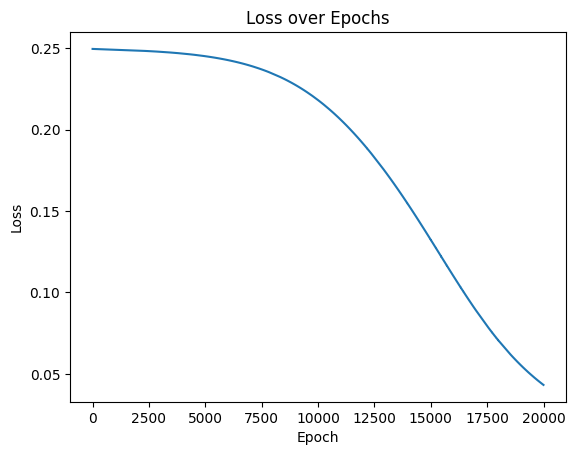

In [49]:
plt.plot(nn.loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 3 - Loading the **MNIST** dataset for testing

In [56]:
# Load MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Load Fashion MNIST dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data preprocessing and reshaping

In [57]:
# Normalize the image data to the range [0, 1]
X_train_mnist = X_train_mnist.astype('float32') / 255.0
X_test_mnist = X_test_mnist.astype('float32') / 255.0

X_train_fashion = X_train_fashion.astype('float32') / 255.0
X_test_fashion = X_test_fashion.astype('float32') / 255.0

# Reshape the data to be (samples, height, width, channels) if using CNN
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)

X_train_fashion = X_train_fashion.reshape(-1, 28, 28, 1)
X_test_fashion = X_test_fashion.reshape(-1, 28, 28, 1)

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical

y_train_mnist = to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = to_categorical(y_test_mnist, num_classes=10)

y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)


## Training on **MNIST**

In [59]:
# Create Neural Network for MNIST
nn_mnist = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10)

# Reshape the data for input
X_train_mnist_flat = X_train_mnist.reshape(-1, 784)  # Flatten the images
X_test_mnist_flat = X_test_mnist.reshape(-1, 784)

In [60]:
# Train the Neural Network
nn_mnist.train(X_train_mnist_flat, y_train_mnist, epochs=10000, learning_rate=0.01)

Epoch 0, Loss: 0.2817


KeyboardInterrupt: 